#                                                   DATA ANALYST PROJECT

Objective:
Analyze retail sales data to derive insights into customer behavior, popular
products, and sales trends.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\SampleSuperstore.csv")
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Exploration and Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.shape

(9994, 13)

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:

df = df.drop_duplicates()


In [9]:
# Check unique values in categorical columns
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['Country'].unique())
print(df['Region'].unique())
print(df['Category'].unique())
print(df['Sub-Category'].unique())


['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


# Descriptive Statistics

In [10]:
# Calculate total sales
total_sales = df['Sales'].sum()

# Calculate average order value
average_order_value = df['Sales'].mean()

# Calculate total quantity sold
total_quantity_sold = df['Quantity'].sum()

# Calculate total profit
total_profit = df['Profit'].sum()

# Print the results
print("Total Sales:", total_sales)
print("Average Order Value:", average_order_value)
print("Total Quantity Sold:", total_quantity_sold)
print("Total Profit:", total_profit)


Total Sales: 2296195.5903
Average Order Value: 230.14890150345792
Total Quantity Sold: 37820
Total Profit: 286241.4226


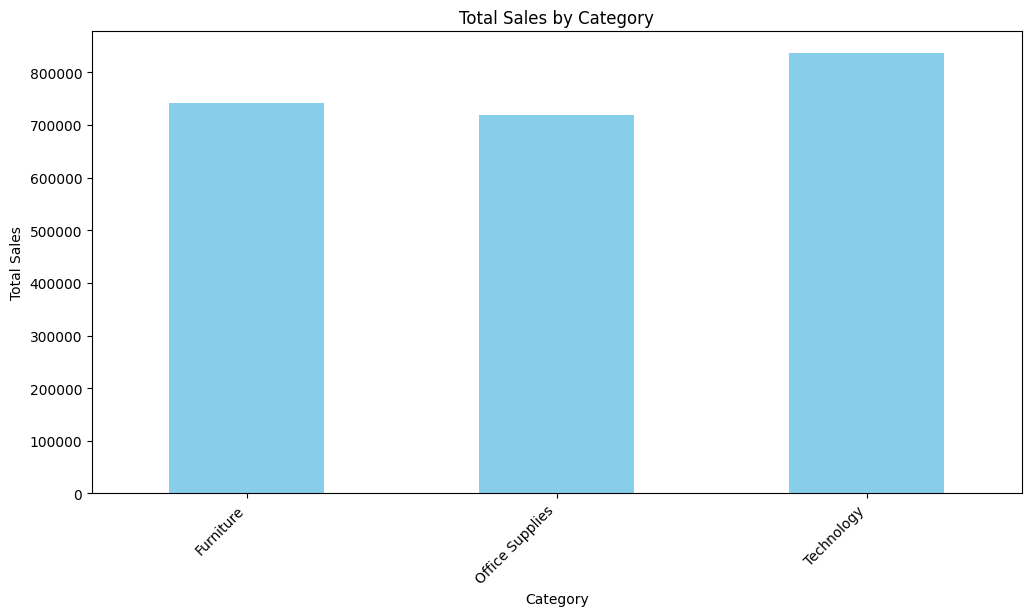

In [11]:
plt.figure(figsize=(12, 6))
df.groupby('Category')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

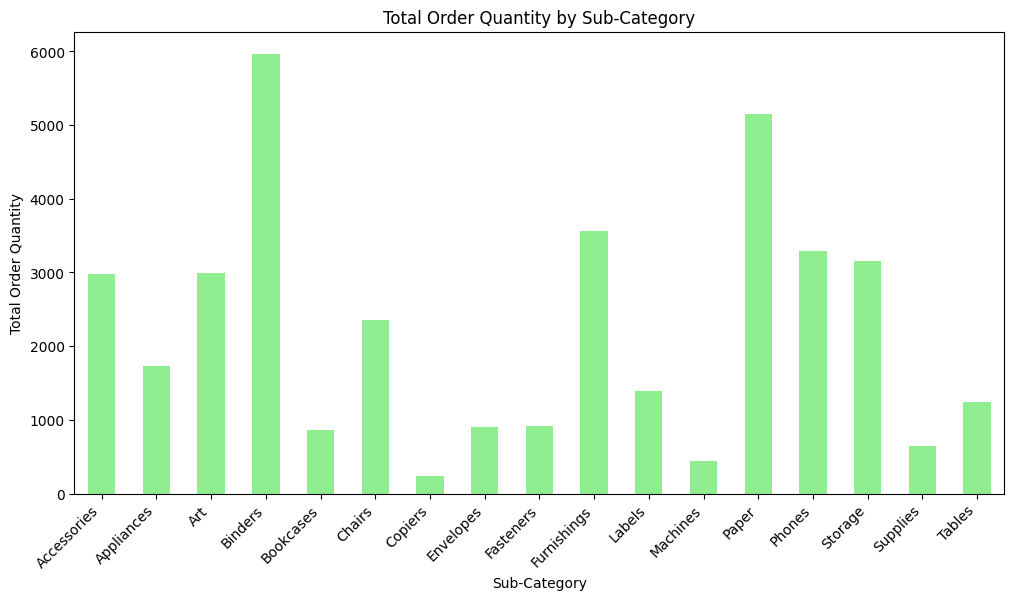

In [12]:
plt.figure(figsize=(12, 6))
df.groupby('Sub-Category')['Quantity'].sum().plot(kind='bar', color='lightgreen')
plt.title('Total Order Quantity by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

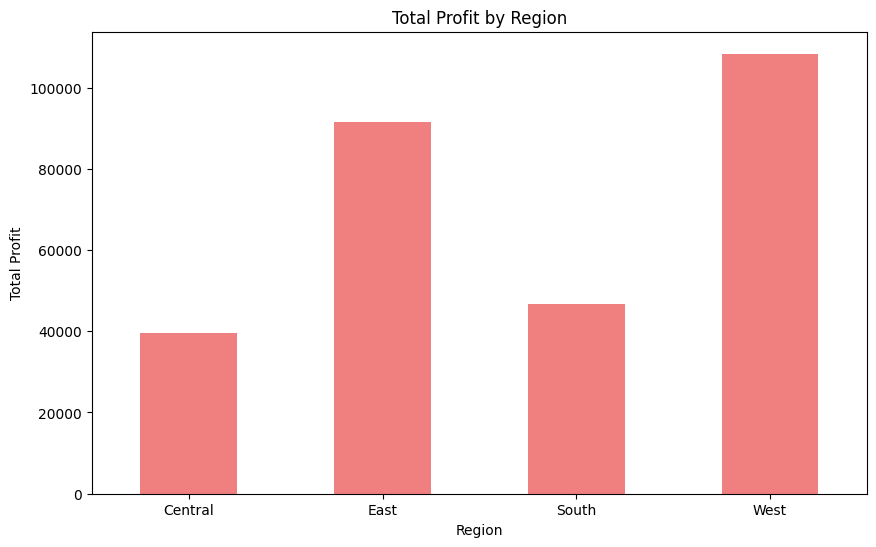

In [13]:
plt.figure(figsize=(10, 6))
df.groupby('Region')['Profit'].sum().plot(kind='bar', color='lightcoral')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.show()

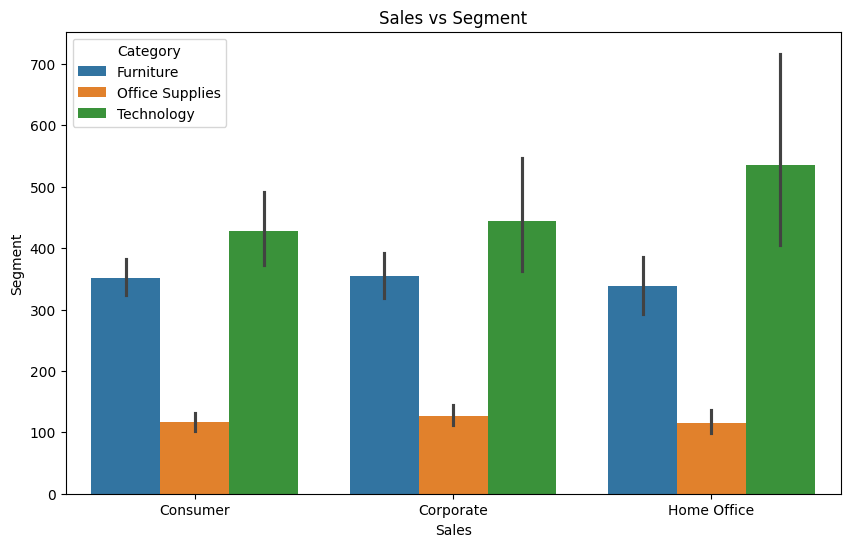

In [14]:
# Line plot of Sales vs Segment
plt.figure(figsize=(10, 6))
sns.barplot(y='Sales', x='Segment', data=df, hue='Category')
plt.title('Sales vs Segment')
plt.xlabel('Sales')
plt.ylabel('Segment')
plt.show()

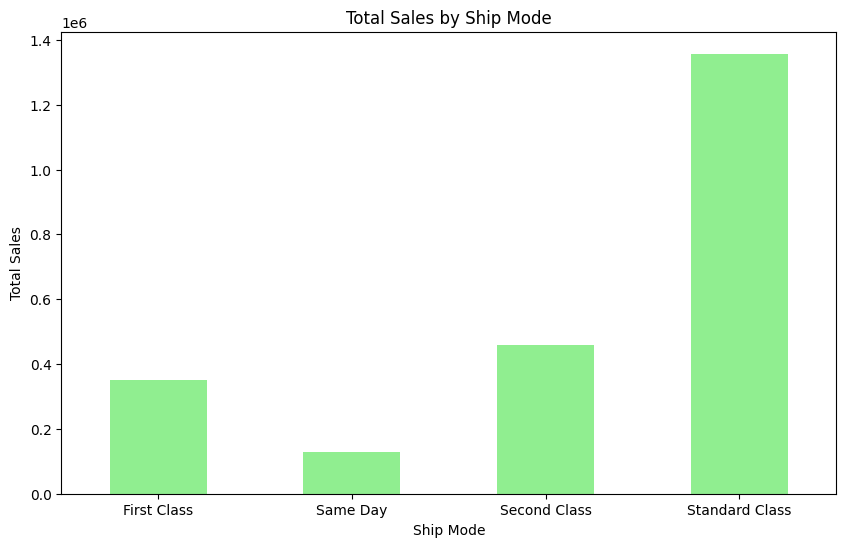

In [15]:
plt.figure(figsize=(10, 6))
df.groupby('Ship Mode')['Sales'].sum().plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

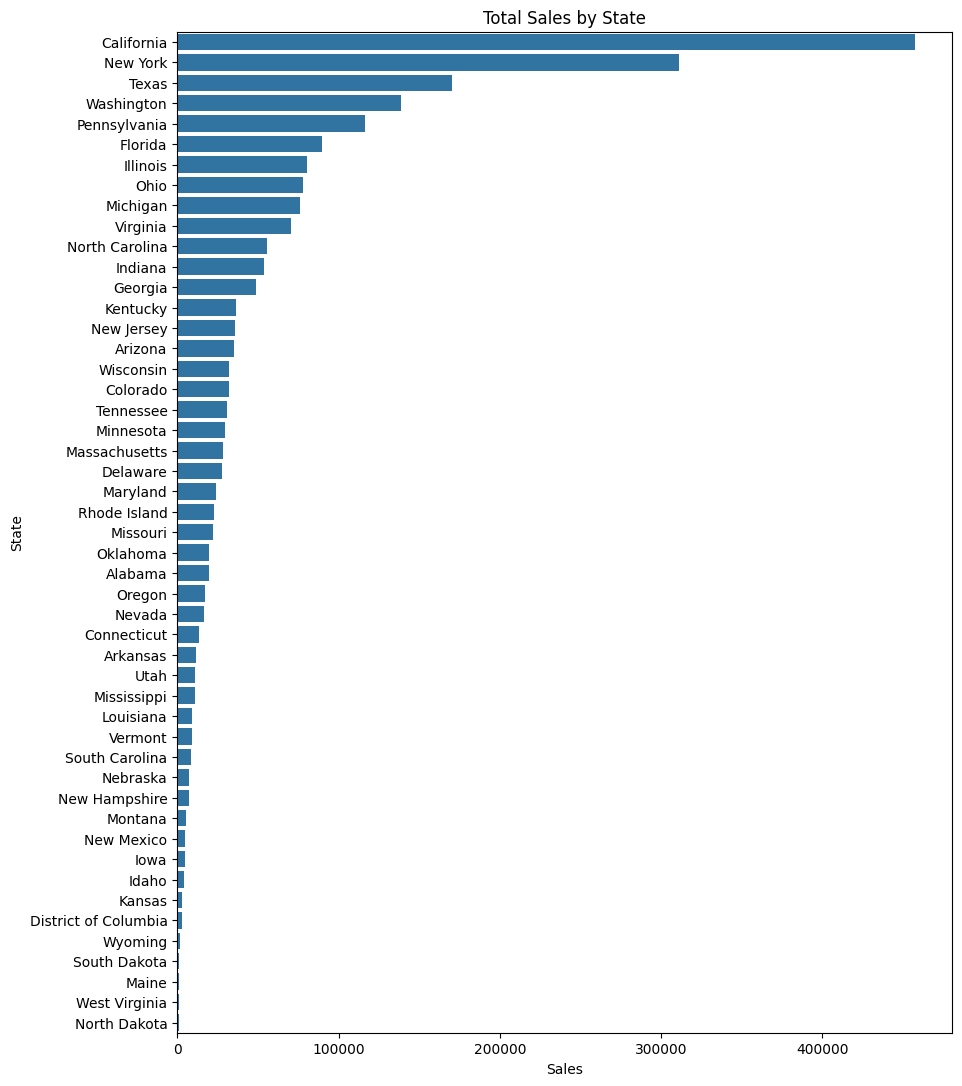

In [16]:
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the DataFrame by the 'Sales' column in descending order
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False)

# Create a horizontal bar graph
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.show()

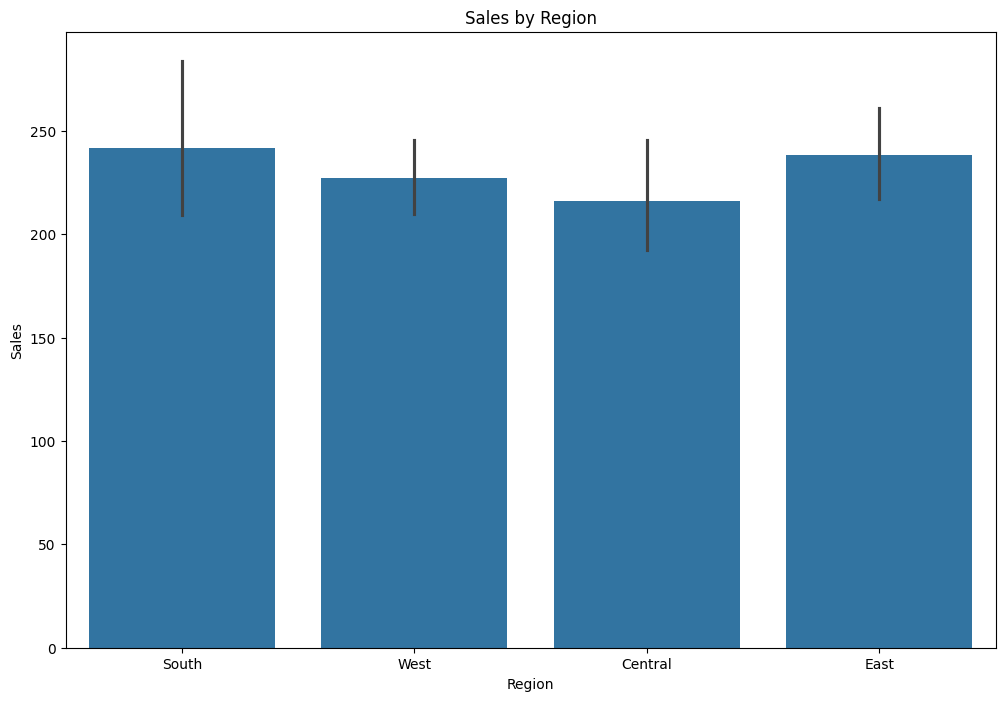

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', data=df)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

In [18]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Customer Segmentation:

In [19]:
# Calculate RFM metrics
rfm_df = df.groupby('Segment').agg({
    'Sales': ['count', 'sum'],  # Calculate frequency and monetary
    'Quantity': 'sum'  # Additional metric
})

# Rename columns
rfm_df.columns = ['Frequency', 'Monetary', 'Quantity']

# Print the RFM dataframe
print(rfm_df)


             Frequency      Monetary  Quantity
Segment                                       
Consumer          5183  1.160833e+06     19497
Corporate         3015  7.060701e+05     11591
Home Office       1779  4.292927e+05      6732


In [20]:
# Define quartiles for segmentation
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])

# Function to assign RFM segments
def rfm_segment(row):
    f_score = 4 if row['Frequency'] >= quantiles.loc[0.75, 'Frequency'] else \
              3 if row['Frequency'] >= quantiles.loc[0.5, 'Frequency'] else \
              2 if row['Frequency'] >= quantiles.loc[0.25, 'Frequency'] else 1
    
    m_score = 4 if row['Monetary'] >= quantiles.loc[0.75, 'Monetary'] else \
              3 if row['Monetary'] >= quantiles.loc[0.5, 'Monetary'] else \
              2 if row['Monetary'] >= quantiles.loc[0.25, 'Monetary'] else 1
    
    q_score = 4 if row['Quantity'] >= quantiles.loc[0.75, 'Quantity'] else \
              3 if row['Quantity'] >= quantiles.loc[0.5, 'Quantity'] else \
              2 if row['Quantity'] >= quantiles.loc[0.25, 'Quantity'] else 1
    
    return str(f_score) + str(m_score) + str(q_score)

# Assign RFM segments to customers
rfm_df['RFM Segment'] = rfm_df.apply(rfm_segment, axis=1)

# Print the RFM dataframe with segments
print(rfm_df)


             Frequency      Monetary  Quantity RFM Segment
Segment                                                   
Consumer          5183  1.160833e+06     19497         444
Corporate         3015  7.060701e+05     11591         333
Home Office       1779  4.292927e+05      6732         111


# Product Analysis

In [21]:
# Identify the top-selling products
top_selling_products = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)

# Identify the top-selling categories
top_selling_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

print("Top Selling Products:")
print(top_selling_products)
print("\nTop Selling Categories:")
print(top_selling_categories)


Top Selling Products:
Sub-Category
Phones         330007.0540
Chairs         327777.7610
Storage        223843.6080
Tables         206965.5320
Binders        203409.1690
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

Top Selling Categories:
Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64


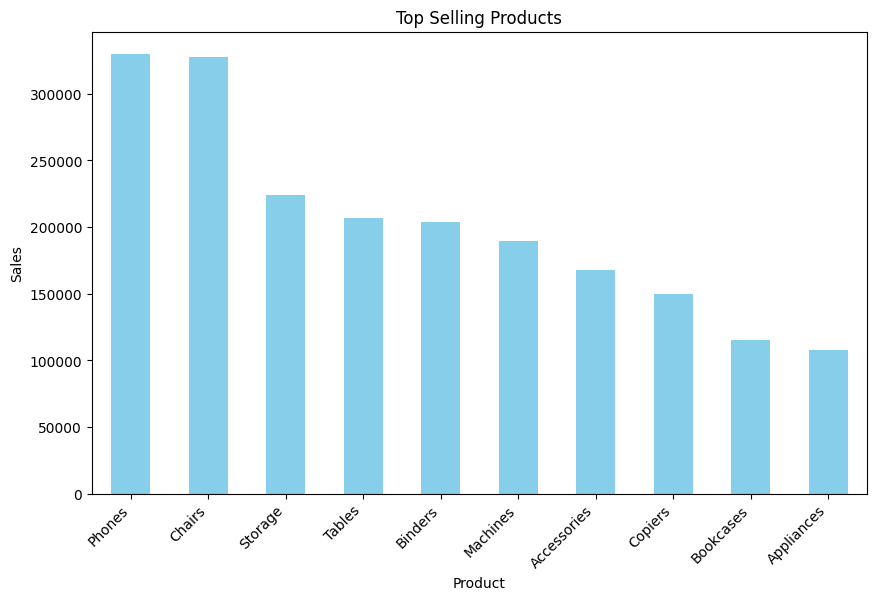

In [22]:
# Plot top selling products
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

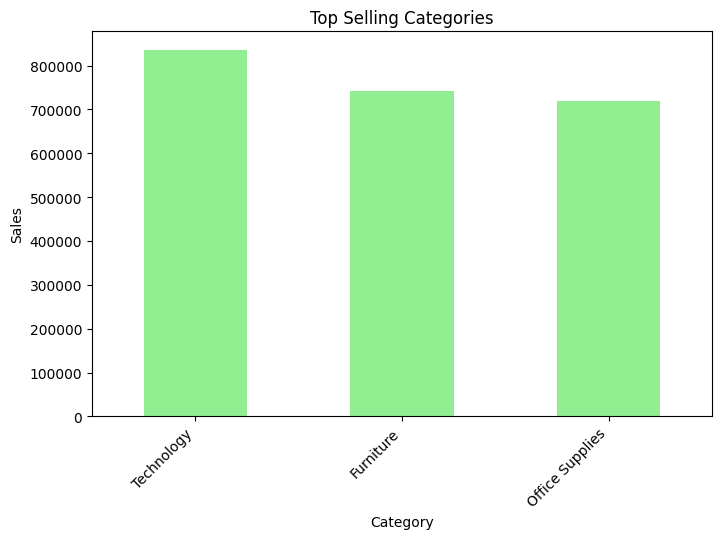

In [23]:
# Plot top selling categories
plt.figure(figsize=(8, 5))
top_selling_categories.plot(kind='bar', color='lightgreen')
plt.title('Top Selling Categories')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

# Time Series Analysis:

In [24]:
# Create a synthetic date column with a fixed start date and a frequency of one day
start_date = '2020-01-01'
num_rows = len(df)
date_column = pd.date_range(start=start_date, periods=num_rows, freq='D')

# Add the synthetic date column to the DataFrame
df['Date'] = date_column



In [25]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Date'],
      dtype='object')

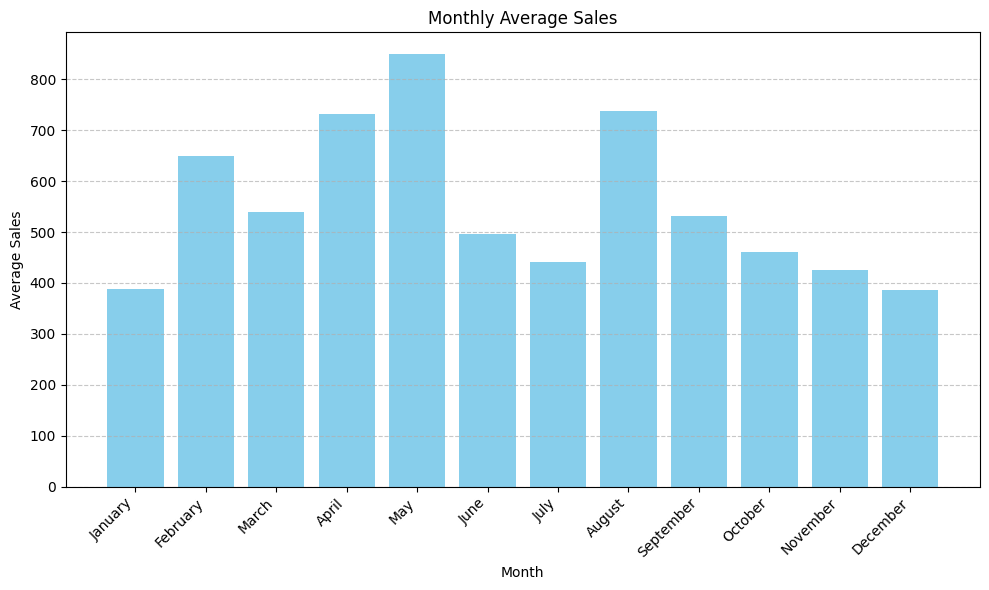

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

# Calculate monthly average sales
monthly_avg_sales = df.resample('M', on='Date')['Sales'].mean()

# Bar graph for monthly average sales
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_sales.index.strftime('%B'), monthly_avg_sales, color='skyblue')
plt.title('Monthly Average Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


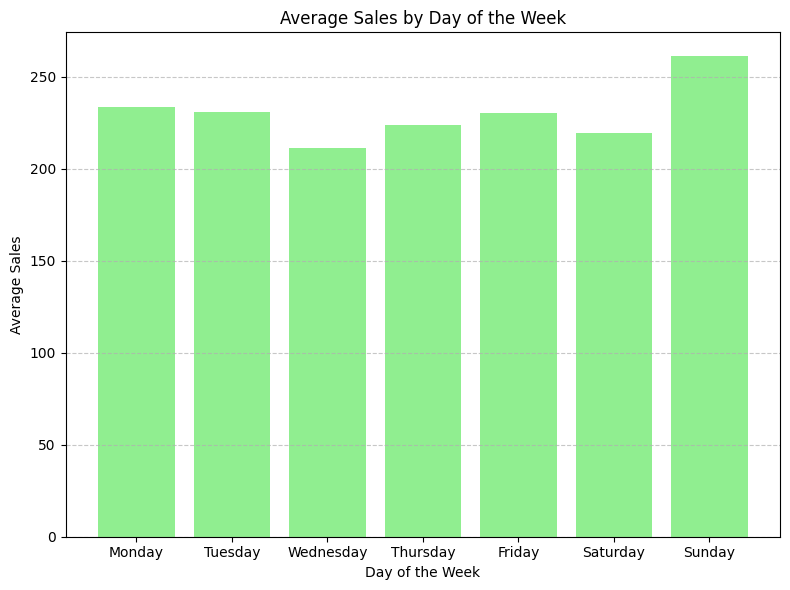

In [27]:
daily_avg_sales = df.groupby(df['Date'].dt.dayofweek)['Sales'].mean()
plt.figure(figsize=(8, 6))
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], daily_avg_sales, color='lightgreen')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

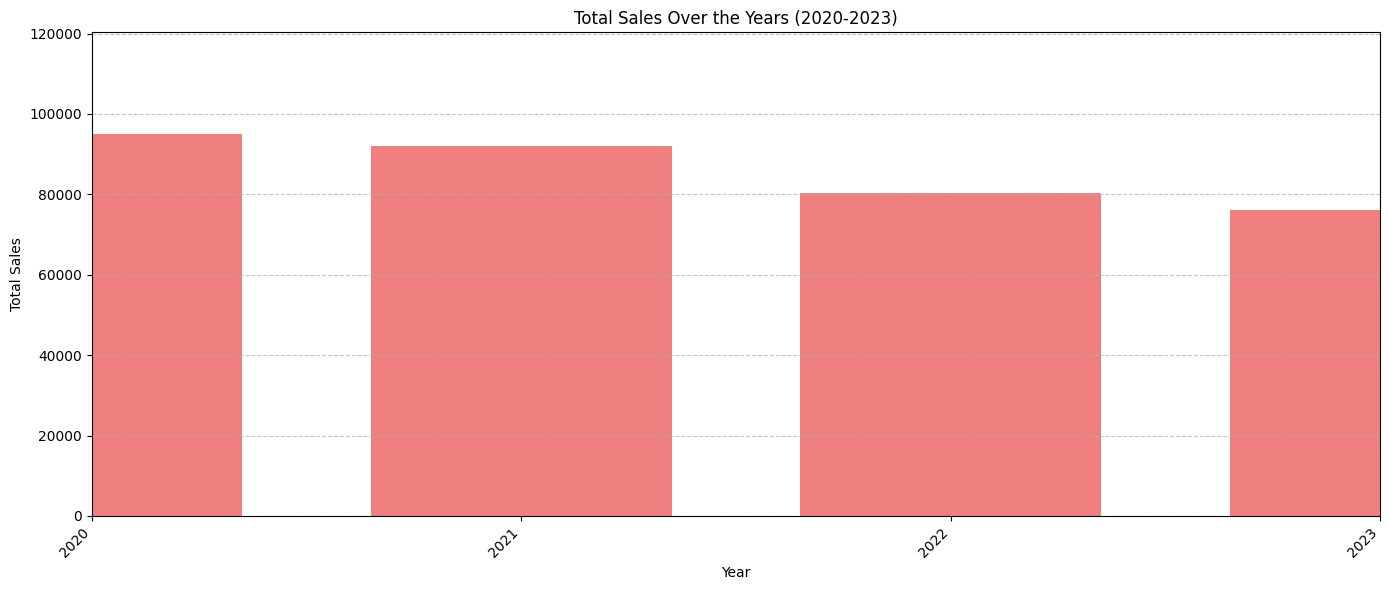

In [28]:
yearly_total_sales = df.resample('Y', on='Date')['Sales'].sum()
plt.figure(figsize=(14, 6))  # Increase the width of the figure
plt.bar(yearly_total_sales.index.strftime('%Y'), yearly_total_sales, color='lightcoral', width=0.7)  # Adjust width as needed
plt.title('Total Sales Over the Years (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim('2020', '2023')
plt.tight_layout()
plt.show()



# Visualization:

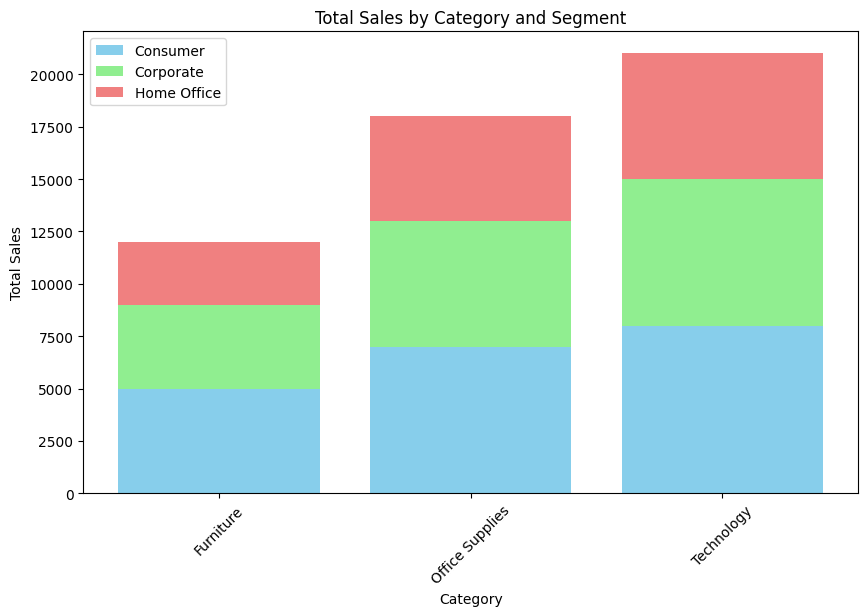

In [29]:
# Sample data
categories = ['Furniture', 'Office Supplies', 'Technology']
consumer_sales = [5000, 7000, 8000]
corporate_sales = [4000, 6000, 7000]
home_office_sales = [3000, 5000, 6000]

# Create stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, consumer_sales, color='skyblue', label='Consumer')
plt.bar(categories, corporate_sales, bottom=consumer_sales, color='lightgreen', label='Corporate')
plt.bar(categories, home_office_sales, bottom=[sum(x) for x in zip(consumer_sales, corporate_sales)], color='lightcoral', label='Home Office')
plt.title('Total Sales by Category and Segment')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()


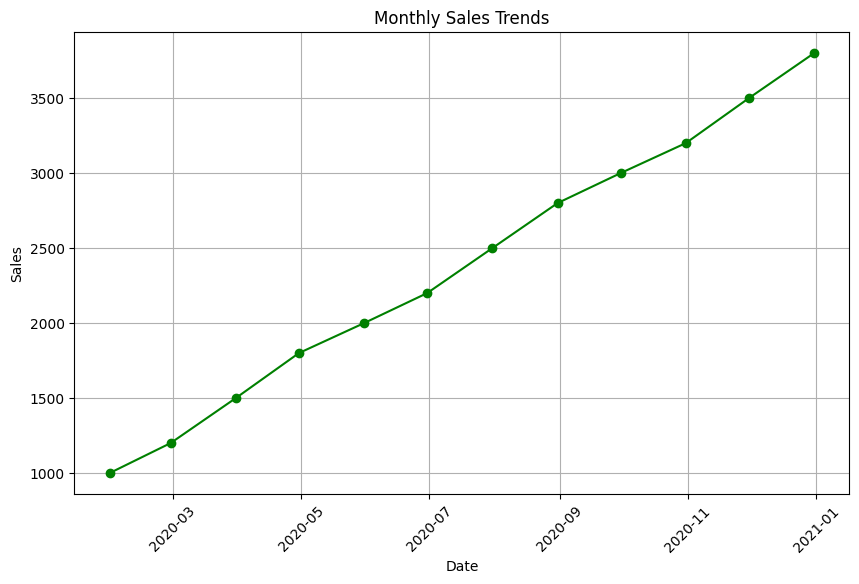

In [30]:
# Sample data
dates = pd.date_range(start='2020-01-01', periods=12, freq='M')
monthly_sales = [1000, 1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000, 3200, 3500, 3800]

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(dates, monthly_sales, marker='o', color='green', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


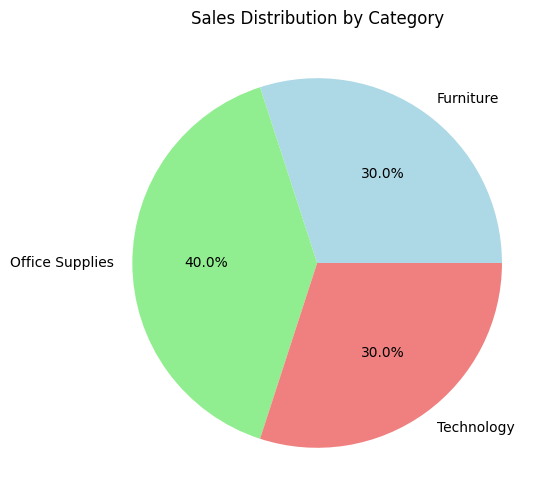

In [31]:
categories = ['Furniture', 'Office Supplies', 'Technology']
sales_percentages = [30, 40, 30]

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sales_percentages, labels=categories, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Sales Distribution by Category')
plt.show()


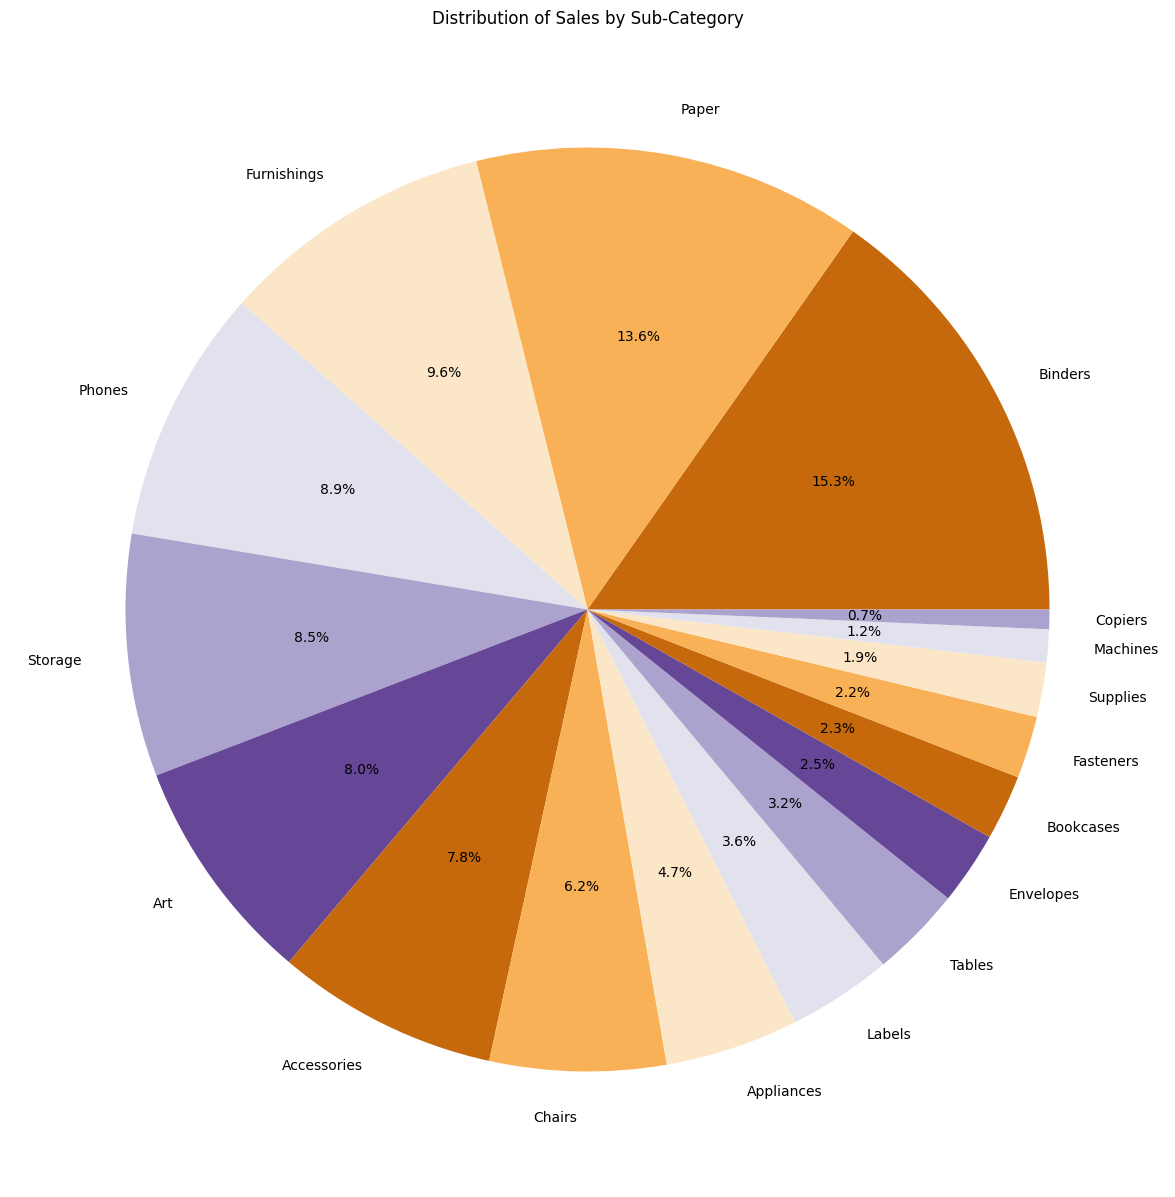

In [32]:
# Calculate the value counts for each sub-category
sub_label = df['Sub-Category'].value_counts().index.to_list()

# Plotting the pie chart
plt.figure(figsize=(15, 15))
plt.pie(df['Sub-Category'].value_counts(), labels=sub_label, autopct='%1.1f%%', colors=sns.color_palette("PuOr"))
plt.title('Distribution of Sales by Sub-Category')
plt.show()


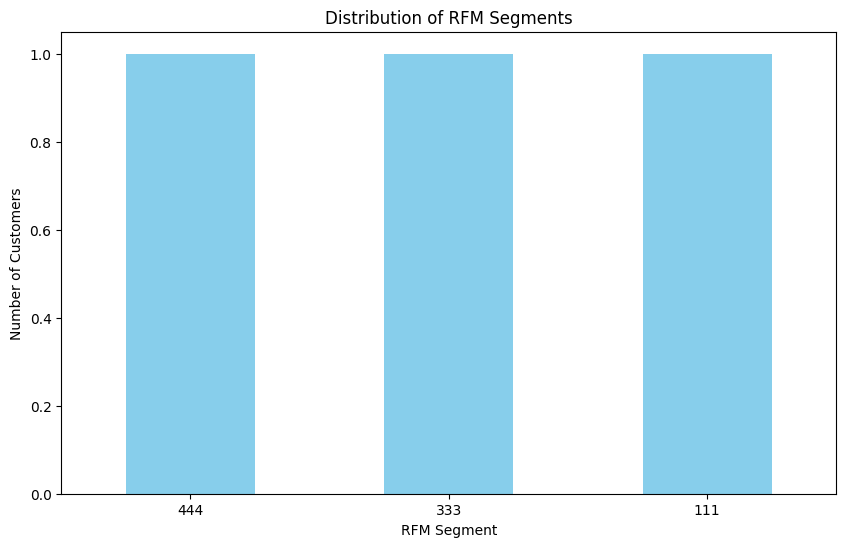

In [33]:
plt.figure(figsize=(10, 6))
rfm_df['RFM Segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of RFM Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


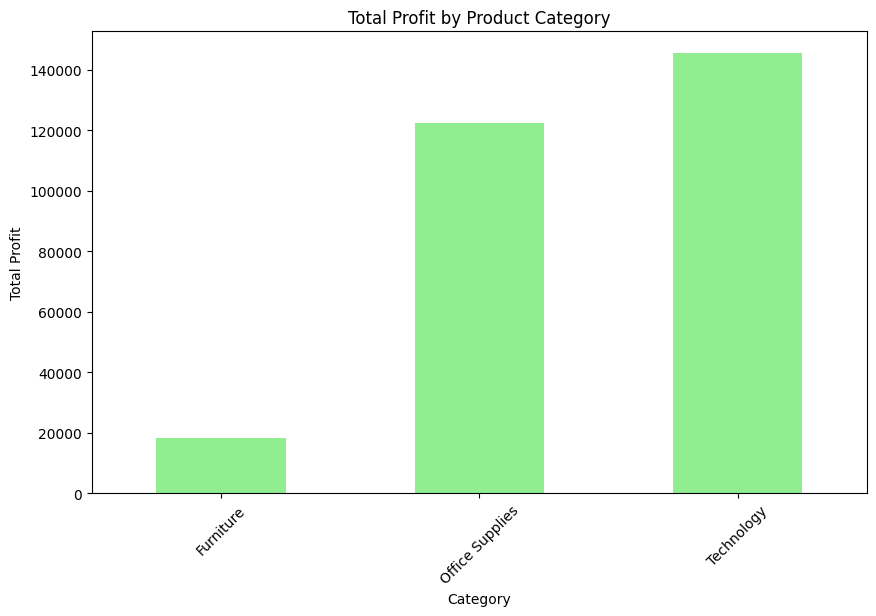

In [34]:
plt.figure(figsize=(10, 6))
df.groupby('Category')['Profit'].sum().plot(kind='bar', color='lightgreen')
plt.title('Total Profit by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


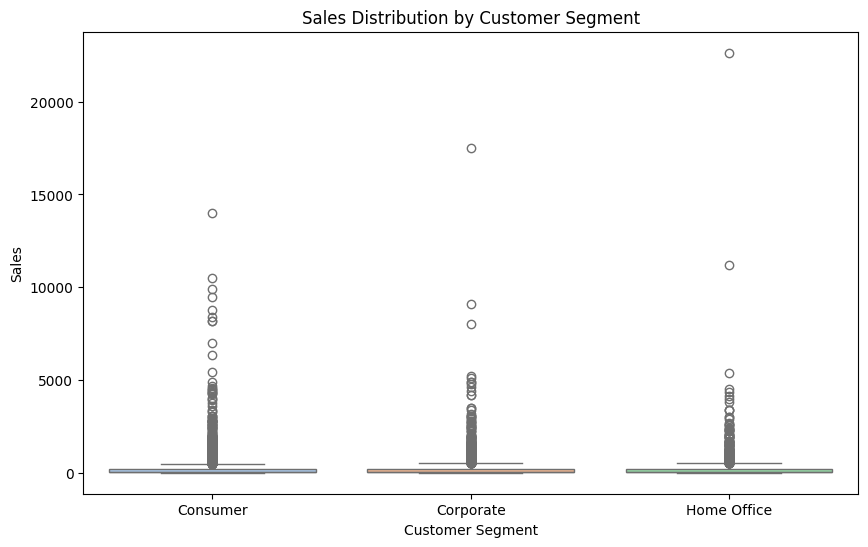

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Sales', hue='Segment', data=df, palette='pastel', legend=False)
plt.title('Sales Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()



# Conclusion and Recommendations

After conducting a comprehensive analysis of the retail sales dataset, several key insights have been derived:

Customer Segmentation: Through RFM analysis, customers were segmented based on their purchasing behavior, revealing distinct customer segments such as high-value customers and frequent customers.
Understanding these segments allows for targeted marketing strategies and personalized customer experiences, which can lead to increased customer satisfaction and loyalty.

Product Analysis:
The analysis identified the top-selling products and categories, providing insights into customer preferences and demand patterns.
By focusing on these top-selling products and categories, the business can optimize inventory management and allocate resources effectively to maximize profitability.

Time Series Analysis:
Time series analysis revealed sales trends over different time periods, including daily, monthly, and yearly variations.
Seasonality and patterns in the sales data were identified, enabling the business to anticipate fluctuations in demand and adjust operational strategies accordingly.

Recommendations:

1.Targeted Marketing Campaigns:
Leverage customer segmentation insights to tailor marketing campaigns and promotions to specific customer segments.
Implement personalized recommendations and targeted offers to enhance customer engagement and drive repeat purchases.

2.Product Assortment Optimization:
Continuously monitor sales trends and adjust product assortments to meet evolving customer preferences.
Identify underperforming products and explore opportunities for product diversification or discontinuation to optimize inventory turnover and maximize profitability.

3.Enhanced Customer Experience:
Invest in enhancing the overall customer experience by offering seamless online shopping experiences, expedited shipping options, and responsive customer support.
Implement loyalty programs and incentives to reward loyal customers and foster long-term relationships.

4.Data-Driven Decision Making:
Emphasize the importance of data-driven decision-making throughout the organization.
Encourage cross-functional collaboration and knowledge-sharing to leverage insights derived from sales data for strategic planning and operational improvements.